In [5]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
text = [
    ["the", "dog", "run", ],
    ["a", "cat", "run", ],
    ["a", "dog", "sleep", ],
    ["the", "cat", "sleep", ],
    ["a", "dog", "bark", ],
    ["the", "cat", "meows", ],
    ["the", "bird", "fly", ],
    ["a", "bird", "sleep", ],
]


def build_word_vector(text):
    word2id = {w: i for i, w in enumerate(sorted(list(set(reduce(lambda a, b: a + b, text)))))}
    id2word = {x[1]: x[0] for x in word2id.items()}
    wvectors = np.zeros((len(word2id), len(word2id)))
    for sentence in text:
        for word1, word2 in zip(sentence[:-1], sentence[1:]):
            id1, id2 = word2id[word1], word2id[word2]
            wvectors[id1, id2] += 1
            wvectors[id2, id1] += 1
    return wvectors, word2id, id2word


def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.sum(np.power(v1, 2))) * np.sqrt(np.sum(np.power(v1, 2))))


def visualize(wvectors, id2word):
    np.random.seed(10)
    fig = plt.figure()
    U, sigma, Vh = np.linalg.svd(wvectors)
    ax = fig.add_subplot(111)
    ax.axis([-1, 1, -1, 1])
    for i in id2word:
        ax.text(U[i, 0], U[i, 1], id2word[i], alpha=0.3, fontsize=20)
    plt.show()

In [6]:
wvectors, word2id, id2word = build_word_vector(text)

In [8]:
print (wvectors)

[[ 0.  0.  1.  1.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  1.  1.  2.]
 [ 2.  1.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  1.  0.  0.  0.  0.  0.]]


In [9]:
print (word2id)

{'a': 0, 'bark': 1, 'bird': 2, 'cat': 3, 'dog': 4, 'fly': 5, 'meows': 6, 'run': 7, 'sleep': 8, 'the': 9}


In [14]:
print(id2word)

{0: 'a', 1: 'bark', 2: 'bird', 3: 'cat', 4: 'dog', 5: 'fly', 6: 'meows', 7: 'run', 8: 'sleep', 9: 'the'}


In [19]:
print(wvectors[word2id["dog"]])

[ 2.  1.  0.  0.  0.  0.  0.  1.  1.  1.]


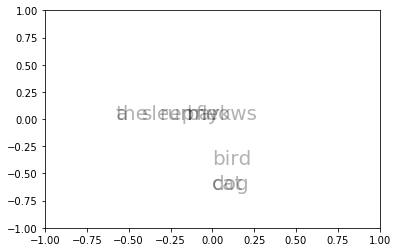

In [13]:
visualize(wvectors,id2word)